In [3]:
import matplotlib.pyplot as plt
import pandas as pd

#File to Load (Remember to Change These)
file_to_load = "../Resources/airports.csv"
airports_data = pd.read_csv(file_to_load)
airports_data.tail(2)

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports
7697,14110,Melitopol Air Base,Melitopol,Ukraine,\N,UKDM,46.880001,35.305000,0,\N,\N,\N,airport,OurAirports


In [4]:
print(airports_data["Airport ID"].count())

duplicate_mouse_id = airports_data.loc[airports_data.duplicated(subset=['Airport ID']),'Airport ID'].unique()
if len(duplicate_mouse_id) == 0:
    duplicate = 0
print(f"Duplicate airport ID found: {duplicate}")

airports_data["Airport ID"].nunique()

7698
Duplicate airport ID found: 0


7698

In [5]:
# An IATA airport code, also known as an IATA location identifier, IATA station code
print(airports_data["IATA"].count())
airports_data["IATA"].nunique()

7698


6073

In [6]:
# The ICAO airport code or location indicator is a four-letter code designating aerodromes around the world.
print(airports_data["ICAO"].count())
airports_data["ICAO"].nunique()

7698


7698

In [5]:
airports_data.isnull().sum()

Airport ID                0
Name                      0
City                     49
Country                   0
IATA                      0
ICAO                      0
Latitude                  0
Longitude                 0
Altitude                  0
Timezone                  0
DST                       0
Tz database time zone     0
Type                      0
Source                    0
dtype: int64

In [7]:
#airports_data.groupby(['Country'])['Country'].value_counts().nlargest(10)
country_counts = airports_data['Country'].value_counts().nlargest(10)
country_counts

United States     1512
Canada             430
Australia          334
Brazil             264
Russia             264
Germany            249
China              241
France             217
United Kingdom     167
India              148
Name: Country, dtype: int64

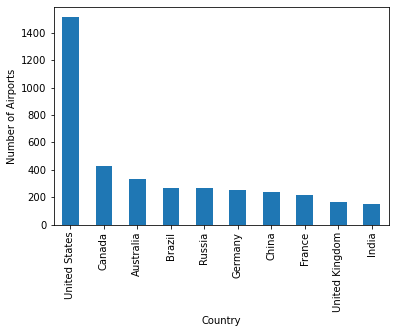

In [8]:
country_counts.plot.bar()
plt.xlabel("Country")
#plt.xticks(rotation=90)
plt.ylabel("Number of Airports")
plt.savefig('../output_data/Number of Airports')
plt.show()

In [9]:
airports_data['Tz database time zone'].value_counts().nlargest(10)

# Need to get rid of \N

\N                     1021
America/New_York        449
America/Chicago         345
Europe/Berlin           222
Europe/Paris            208
Asia/Shanghai           187
America/Anchorage       177
America/Los_Angeles     166
Europe/London           155
America/Toronto         133
Name: Tz database time zone, dtype: int64

In [10]:
# Use a backslash before \N. The backslash is a special character used for escaping other special characters. 
# So \N will be treated as a string literal instead of a special character 
clean_airports_df = airports_data.loc[airports_data["Tz database time zone"] != "\\N"]

In [11]:
timezone_counts = clean_airports_df['Tz database time zone'].value_counts().nlargest(10)
timezone_counts

America/New_York       449
America/Chicago        345
Europe/Berlin          222
Europe/Paris           208
Asia/Shanghai          187
America/Anchorage      177
America/Los_Angeles    166
Europe/London          155
America/Toronto        133
Asia/Calcutta          131
Name: Tz database time zone, dtype: int64

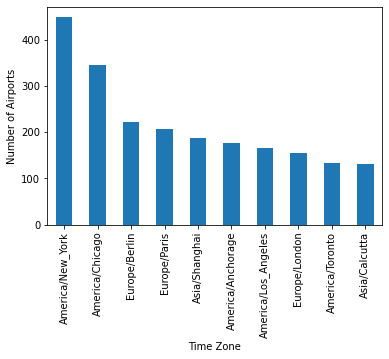

In [12]:
timezone_counts.plot.bar()
plt.xlabel("Time Zone")
#plt.xticks(rotation=90)
plt.ylabel("Number of Airports")
plt.savefig('../output_data/Time zone')
plt.show()